In [153]:
import pandas as pd
import numpy as np
import departmentclean as dc
import matplotlib.pyplot as plt
import studentcounselingclean as scc
import studentperformanceclean as spc

In [154]:
#The first section pertains to the DESCRIPTIVE ANALYSIS of the data

In [155]:
# department data descriptive analysis
dep_data = pd.read_csv('../Department_Information.csv')
departments = dc.checkDepartment(dep_data)

Duplicate Department IDs found:
   Department_ID                                    Department_Name        DOE
1      IDEPT5528                     Biosciences and Bioengineering  6/28/1943
11     IDEPT1825                             Mechanical Engineering  9/21/1971
15     IDEPT3868          Center for Learning and Teaching (PPCCLT)  3/26/1982
21     IDEPT5528                      Sanitation and Digital Gaming        nan
24     IDEPT7005  Centre of Studies in Resources Engineering (CSRE)  8/22/1966
25     IDEPT7005      Centre of Studies in Craft Engineering (CSCE)  8/22/1966
27     IDEPT9009            Centre for the Study of Ecology in Mars   7/9/2025
35     IDEPT3868          Center for Learning and Teaching (PPCCLT)  3/26/1982
39     IDEPT9009                      Laser Technology Enhancements        nan
45     IDEPT1825                         Materials Strength Testing  9/21/1971

Duplicate Department Names found:
   Department_ID                            Department_Name     

In [156]:
departments.head()

,Department_ID,Department_Name,DOE
0,IDEPT4670,Aerospace Engineering,5/31/1961
1,IDEPT5528,Biosciences and Bioengineering,6/28/1943
2,IDEPT3115,Chemical Engineering,5/1/1940
3,IDEPT5881,Chemistry,6/8/2013
4,IDEPT4938,Civil Engineering,10/27/1941


In [157]:
departments.shape

(47, 3)

In [158]:
departments.describe()

,Department_ID,Department_Name,DOE
count,47,47,47
unique,42,46,43
top,IDEPT1825,Center for Learning and Teaching (PPCCLT),nan
freq,2,2,2


In [159]:
student_counceling_data = pd.read_csv('../Student_Counceling_Information.csv')
counceling = scc.checkStudent(student_counceling_data)

Missing values in Department_Admission found:
      Student_ID       DOA        DOB Department_Choices Department_Admission
298  SID20135073  7/1/2013  12/7/1995                NaN                  NaN



In [160]:
counceling.head()

,Student_ID,DOA,DOB,Department_Choices,Department_Admission
0,SID20131143,7/1/2013,2/5/1996,IDEPT7783,IDEPT7783
1,SID20131151,7/1/2013,7/31/1995,IDEPT6347,IDEPT6347
2,SID20131171,7/1/2013,9/5/1995,IDEPT1836,IDEPT1836
3,SID20131176,7/1/2013,1/12/1996,IDEPT8473,IDEPT8473
4,SID20131177,7/1/2013,7/30/1995,IDEPT5528,IDEPT5528


In [161]:
counceling.shape

(4000, 5)

In [162]:
counceling.describe()

,Student_ID,DOA,DOB,Department_Choices,Department_Admission
count,4000,4000,4000,3999,3999
unique,3819,6,1798,41,41
top,SID20162976,7/1/2015,5/21/1997,IDEPT6347,IDEPT3115
freq,3,692,9,118,124


In [163]:
student_performance_data = pd.read_csv('../Student_Performance_Data.csv')
performance = spc.checkPerformance(student_performance_data)

Missing values found:
         Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
125     SID20131171        Sem_3  SEMI0031818        NaN   87.0          11.0
172218  SID20179280        Sem_4  SEMI0044518    Paper 6    NaN           NaN
209593  SID20189989        Sem_6  SEMI0064181    Paper 4    NaN           6.0

Invalid marks (outside the range 0-100) found:
         Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
328     SID20131189        Sem_1  SEMI0015910    Paper 4  -49.0           0.0
414     SID20131191        Sem_5  SEMI0055015    Paper 6  207.0          14.0
551     SID20131231        Sem_1  SEMI0016208    Paper 5 -100.0          14.0
840     SID20131303        Sem_3  SEMI0031818    Paper 4  140.0          14.0
181488  SID20182774        Sem_8  SEMI0086600    Paper 6  999.0           5.0

Invalid effort hours (less than 0 or non-integer) found:
        Student_ID Semster_Name     Paper_ID Paper_Name  Marks  Effort_Hours
59635  SID20147

In [164]:
performance.head()

,Student_ID,Semster_Name,Paper_ID,Paper_Name,Marks,Effort_Hours
0,SID20131143,Sem_1,SEMI0012995,Paper 1,44.0,5.0
1,SID20131143,Sem_1,SEMI0015183,Paper 2,74.0,8.0
2,SID20131143,Sem_1,SEMI0018371,Paper 3,80.0,8.0
3,SID20131143,Sem_1,SEMI0015910,Paper 4,44.0,5.0
4,SID20131143,Sem_1,SEMI0016208,Paper 5,95.0,12.0


In [165]:
performance.shape

(209601, 6)

In [166]:
performance.describe()

,Marks,Effort_Hours
count,209601.000000,209601.000000
mean,69.589372,8.085233
std,18.098372,2.797781
min,19.000000,2.000000
25%,54.000000,6.000000
50%,70.000000,7.000000
75%,85.000000,10.000000
max,100.000000,257.000000


In [167]:
#based on the description of performance, the max value of 257 is quite an extreme
#below you can see how it effects the visual scatter plot representation

<Axes: title={'center': 'Scatterplot of effort hours and mark percentages'}, xlabel='Effort_Hours', ylabel='Marks'>

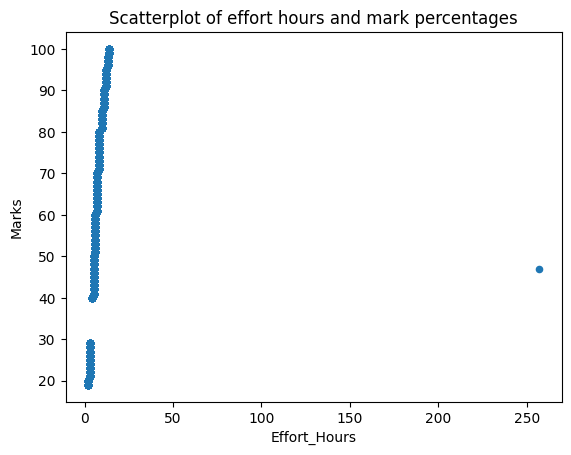

In [168]:
performance.plot.scatter(x='Effort_Hours', y='Marks', title='Scatterplot of effort hours and mark percentages')

<Axes: title={'center': 'Scatterplot of effort hours and mark percentages'}, xlabel='Effort_Hours', ylabel='Marks'>

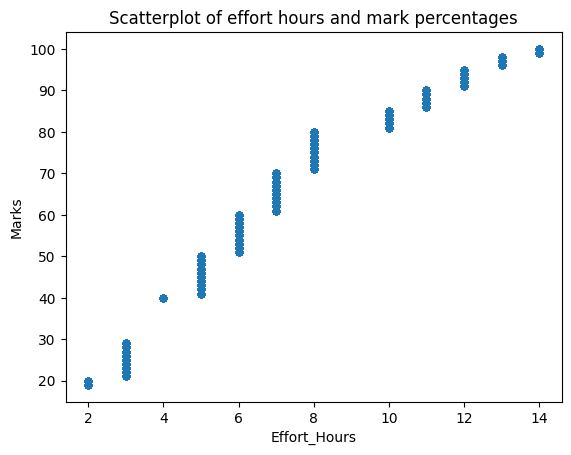

In [169]:
#outlier here is 257, lets try this again to see if we can create a better looking scatter-plot
outlier_value = 257
# Filter out outliers
performance_filtered = performance[(performance['Effort_Hours'] <outlier_value )]

# Plot the scatterplot with filtered data
performance_filtered.plot.scatter(x='Effort_Hours', y='Marks', title='Scatterplot of effort hours and mark percentages')


In [170]:
#Now we may begin with the PREDICTIVE ANALYSIS Section
#Here we wil consider the Student Performance data and will do some predictive analysis 
#Predict student scores based on EFFORT HOURS of 10

In [171]:
# Calculate Pearson correlation coefficient
correlation = performance_filtered['Effort_Hours'].corr(performance_filtered['Marks'], method ='pearson')

print("Pearson correlation coefficient between effort hours and scores with filtered:", correlation)



Pearson correlation coefficient between effort hours and scores with filtered: 0.9658471894882165


In [172]:
# Calculate Pearson correlation coefficient
correlation = performance['Effort_Hours'].corr(performance['Marks'], method = 'pearson')

print("Pearson correlation coefficient between effort hours and scores with no filter:", correlation)

Pearson correlation coefficient between effort hours and scores with no filter: 0.9469009464453048


In [173]:
y = performance_filtered['Marks'].values.reshape(-1, 1)
X = performance_filtered['Effort_Hours'].values.reshape(-1, 1)

In [174]:
print('X shape:', X.shape)
print('X:', X)
print('X shape:', y.shape)
print('Y:', y)

X shape: (209600, 1)
X: [[ 5.]
 [ 8.]
 [ 8.]
 ...
 [ 5.]
 [11.]
 [ 8.]]
X shape: (209600, 1)
Y: [[44.]
 [74.]
 [80.]
 ...
 [49.]
 [87.]
 [73.]]


In [175]:
print(performance_filtered['Effort_Hours'].values) # [2.5 5.1 3.2 8.5 3.5 1.5 9.2 ... ]
print(performance_filtered['Effort_Hours'].values.shape) # (25,)

[ 5.  8.  8. ...  5. 11.  8.]
(209600,)


In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [177]:
print(X_train)
print(y_train)

[[12.]
 [12.]
 [ 6.]
 ...
 [ 8.]
 [12.]
 [ 6.]]
[[95.]
 [93.]
 [55.]
 ...
 [77.]
 [93.]
 [55.]]


In [178]:
# Now, let's train the model. 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Now we need to "fit" the line to our data: we use .fit with our X_tran and y_train data. 
regressor.fit(X_train, y_train)

LinearRegression()

In [179]:
print(regressor.intercept_)

[18.08535503]


In [180]:
print(regressor.coef_)

[[6.37110352]]


In [181]:
my_hours = 10
score = 6.06557595 * my_hours + 20.55214854
print(score)

81.20790804


In [182]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

In [183]:
score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[[78.61083851]]


In [184]:
score = regressor.predict([[9.5]]) # We are passing 9.5 in double brackets to have a 2-dimensional array
print(score)

[[78.61083851]]


In [185]:
y_pred = regressor.predict(X_test)
print(y_pred)

[[49.94087265]
 [69.05418322]
 [94.53859732]
 ...
 [81.79639027]
 [62.6830797 ]
 [62.6830797 ]]


In [186]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

       Actual  Predicted
0        47.0  49.940873
1        78.0  69.054183
2        91.0  94.538597
3        53.0  56.311976
4        79.0  69.054183
...       ...        ...
41915    73.0  69.054183
41916    65.0  62.683080
41917    84.0  81.796390
41918    65.0  62.683080
41919    67.0  62.683080

[41920 rows x 2 columns]


In [187]:
#The students to test. The model will work with any student, these are just to verify results
student_ids = ['SID20131151', 'SID20149500', 'SID20182516']

In [188]:

def predictStudentScores(student_ids, counceling):

    predicted_scores = {} #initally empty

    # Iterate through each student ID
    for specific_student_id in student_ids:
       
        # Filter data for the specific student
        student_data = performance_filtered[performance_filtered['Student_ID'] == specific_student_id]

        # Prepare data for model training
        X = student_data['Effort_Hours'].values.reshape(-1, 1)
        y = student_data['Marks'].values

        # Train linear regression model for the specific student
        regressor = LinearRegression().fit(X, y)

        # Predict next paper score assuming 10 hours of effort for the specific student
        next_paper_score = regressor.predict([[10]])[0]
        predicted_scores[specific_student_id] = next_paper_score

    for student_id, score in predicted_scores.items():
         merged_data = pd.merge(performance_filtered, counceling, on='Student_ID')
         student_data = merged_data[merged_data['Student_ID'] == student_id]
         department_admission = student_data['Department_Admission'].iloc[0]
         print("Predicted next paper score for", student_id, ":", score, "---", "In Department: ",department_admission)

In [189]:
predictStudentScores(student_ids,counceling)

Predicted next paper score for SID20131151 : 81.91546178813809 --- In Department:  IDEPT6347
Predicted next paper score for SID20149500 : 82.25427947376441 --- In Department:  IDEPT4308
Predicted next paper score for SID20182516 : 82.1694259983626 --- In Department:  IDEPT3062


In [190]:
### EVALUATING the Model ###
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
print(f"mae = {mae:.2f}")
print(f"mse = {mse:.2f}")
print(f"rmse = {rmse:.2f}")

mae = 3.73
mse = 22.19
rmse = 4.71
